# Predict house pricing using advanced regression

In [1]:
# Predict house pricing using advanced regression in this notebook

In [2]:
#libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [4]:
#read the data 

In [5]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [6]:
#eda

In [7]:
#see first 5 cels

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#data info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
#data corelations

In [12]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [13]:
#data statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [15]:
#see mising values

In [16]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
#data shape

In [18]:
df.shape

(1460, 81)

In [19]:
# rows %80

In [20]:
1640*(80/100)

1312.0

In [21]:
#we will drop MiscFeature  Fence  PoolQC Alley 

In [22]:
df = df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"])

In [23]:
#check

In [24]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [25]:
#handle mising values

In [26]:
import pandas as pd

def auto_fill_missing_values(df):
    """
    Automatically fill missing values in a DataFrame.
    """
    # Separate columns by data type
    numerical_columns = df.select_dtypes(include='number').columns
    categorical_columns = df.select_dtypes(exclude='number').columns

    # Fill missing values for numerical columns with the mean
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

    # Fill missing values for categorical columns with the mode
    df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

    return df

# Example usage
df = auto_fill_missing_values(df)

#warning ! this script belong to chat gpt 3.5

In [27]:
#data visualization

<IPython.core.display.Javascript object>


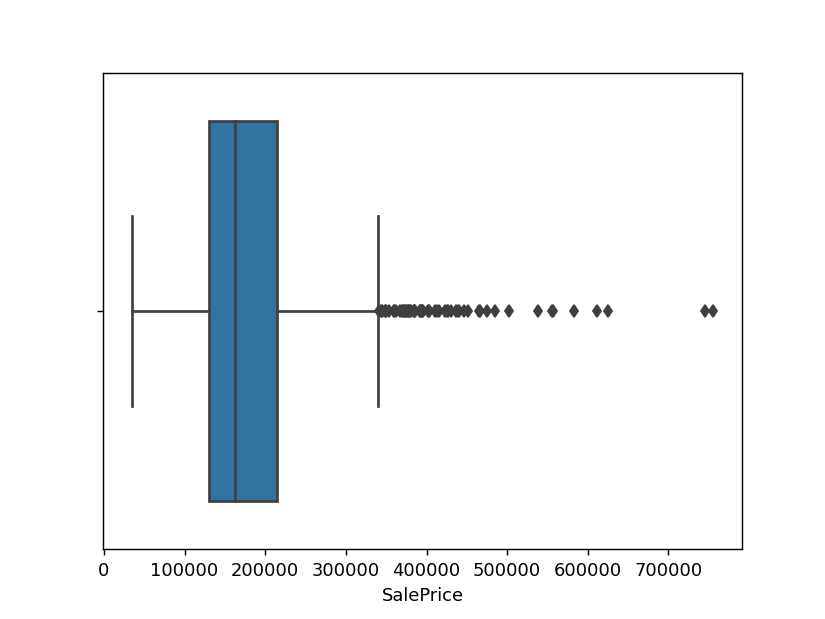

In [28]:
%matplotlib notebook
sns.boxplot(x=df["SalePrice"])
plt.show()

In [29]:
#terrible

In [30]:
#for this reason we will use deep learning 

# Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping

In [32]:
# maek dummy colons

In [33]:
df=pd.get_dummies(df,drop_first=True)

In [34]:
#split data into train test 

In [35]:
x=df.drop('SalePrice',axis=1)
y=df[['SalePrice']]

In [36]:
#//

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
#look data shape

In [39]:
df.shape

(1460, 238)

In [40]:
#create model

In [41]:
model = Sequential()
model.add(Dense(238, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')

In [42]:
# Define early stopping callback

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

In [44]:
#model fiting

In [45]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=60, epochs=2000, callbacks=[early_stopping])

Epoch 1/2000
20/20 [==============================] - 2s 18ms/step - loss: 35373248512.0000 - val_loss: 27767670784.0000
Epoch 2/2000
20/20 [==============================] - 0s 6ms/step - loss: 18786951168.0000 - val_loss: 7728407552.0000
Epoch 3/2000
20/20 [==============================] - 0s 6ms/step - loss: 8717806592.0000 - val_loss: 5818784256.0000
Epoch 4/2000
20/20 [==============================] - 0s 6ms/step - loss: 6006235136.0000 - val_loss: 4933787648.0000
Epoch 5/2000
20/20 [==============================] - 0s 7ms/step - loss: 4735979520.0000 - val_loss: 4520209920.0000
Epoch 6/2000
20/20 [==============================] - 0s 7ms/step - loss: 4091588864.0000 - val_loss: 4248569600.0000
Epoch 7/2000
20/20 [==============================] - 0s 6ms/step - loss: 3550909696.0000 - val_loss: 4327352832.0000
Epoch 8/2000
20/20 [==============================] - 0s 8ms/step - loss: 3424154112.0000 - val_loss: 3835139328.0000
Epoch 9/2000
20/20 [==============================] 

Epoch 70/2000
20/20 [==============================] - 0s 7ms/step - loss: 1521246720.0000 - val_loss: 1419224704.0000
Epoch 71/2000
20/20 [==============================] - 0s 7ms/step - loss: 1509671680.0000 - val_loss: 1422923520.0000
Epoch 72/2000
20/20 [==============================] - 0s 9ms/step - loss: 1472100352.0000 - val_loss: 1637524608.0000
Epoch 73/2000
20/20 [==============================] - 0s 7ms/step - loss: 1566170240.0000 - val_loss: 1400543488.0000
Epoch 74/2000
20/20 [==============================] - 0s 7ms/step - loss: 1468439808.0000 - val_loss: 1517028224.0000
Epoch 75/2000
20/20 [==============================] - 0s 8ms/step - loss: 1518511616.0000 - val_loss: 1388720896.0000
Epoch 76/2000
20/20 [==============================] - 0s 7ms/step - loss: 1581736960.0000 - val_loss: 1485757312.0000
Epoch 77/2000
20/20 [==============================] - 0s 7ms/step - loss: 1493987968.0000 - val_loss: 1379071744.0000
Epoch 78/2000
20/20 [===========================

20/20 [==============================] - 0s 6ms/step - loss: 1016925952.0000 - val_loss: 1350935936.0000
Epoch 139/2000
20/20 [==============================] - 0s 6ms/step - loss: 951190976.0000 - val_loss: 1148728192.0000
Epoch 140/2000
20/20 [==============================] - 0s 8ms/step - loss: 932907136.0000 - val_loss: 1163511424.0000
Epoch 141/2000
20/20 [==============================] - 0s 6ms/step - loss: 921278528.0000 - val_loss: 1167956096.0000
Epoch 142/2000
20/20 [==============================] - 0s 7ms/step - loss: 913853760.0000 - val_loss: 1147458432.0000
Epoch 143/2000
20/20 [==============================] - 0s 7ms/step - loss: 906107328.0000 - val_loss: 1130744448.0000
Epoch 144/2000
20/20 [==============================] - 0s 6ms/step - loss: 886205248.0000 - val_loss: 1279836160.0000
Epoch 145/2000
20/20 [==============================] - 0s 6ms/step - loss: 906834624.0000 - val_loss: 1213679360.0000
Epoch 146/2000
20/20 [==============================] - 0s 8ms

20/20 [==============================] - 0s 9ms/step - loss: 554378816.0000 - val_loss: 863118336.0000
Epoch 208/2000
20/20 [==============================] - 0s 7ms/step - loss: 524845568.0000 - val_loss: 839315520.0000
Epoch 209/2000
20/20 [==============================] - 0s 6ms/step - loss: 523761696.0000 - val_loss: 897913088.0000
Epoch 210/2000
20/20 [==============================] - 0s 7ms/step - loss: 570075008.0000 - val_loss: 803556224.0000
Epoch 211/2000
20/20 [==============================] - 0s 6ms/step - loss: 518945024.0000 - val_loss: 837965376.0000
Epoch 212/2000
20/20 [==============================] - 0s 5ms/step - loss: 511075584.0000 - val_loss: 827537664.0000
Epoch 213/2000
20/20 [==============================] - 0s 7ms/step - loss: 506281376.0000 - val_loss: 889481216.0000
Epoch 214/2000
20/20 [==============================] - 0s 6ms/step - loss: 489621696.0000 - val_loss: 855763136.0000
Epoch 215/2000
20/20 [==============================] - 0s 6ms/step - l

20/20 [==============================] - 0s 6ms/step - loss: 400210016.0000 - val_loss: 792441344.0000
Epoch 277/2000
20/20 [==============================] - 0s 7ms/step - loss: 389227328.0000 - val_loss: 785050112.0000
Epoch 278/2000
20/20 [==============================] - 0s 6ms/step - loss: 385696128.0000 - val_loss: 813846016.0000
Epoch 279/2000
20/20 [==============================] - 0s 7ms/step - loss: 373023008.0000 - val_loss: 759594304.0000
Epoch 280/2000
20/20 [==============================] - 0s 7ms/step - loss: 367717248.0000 - val_loss: 786525248.0000
Epoch 281/2000
20/20 [==============================] - 0s 5ms/step - loss: 376089440.0000 - val_loss: 786395840.0000
Epoch 282/2000
20/20 [==============================] - 0s 7ms/step - loss: 353423936.0000 - val_loss: 823811328.0000
Epoch 283/2000
20/20 [==============================] - 0s 6ms/step - loss: 342273888.0000 - val_loss: 781703424.0000
Epoch 284/2000
20/20 [==============================] - 0s 7ms/step - l

20/20 [==============================] - 0s 7ms/step - loss: 333863680.0000 - val_loss: 820120512.0000
Epoch 346/2000
20/20 [==============================] - 0s 6ms/step - loss: 316361760.0000 - val_loss: 948511744.0000
Epoch 347/2000
20/20 [==============================] - 0s 8ms/step - loss: 361628064.0000 - val_loss: 815873472.0000
Epoch 348/2000
20/20 [==============================] - 0s 6ms/step - loss: 359036544.0000 - val_loss: 845240384.0000
Epoch 349/2000
20/20 [==============================] - 0s 7ms/step - loss: 385358624.0000 - val_loss: 849986240.0000
Epoch 350/2000
20/20 [==============================] - 0s 7ms/step - loss: 325039904.0000 - val_loss: 746295808.0000
Epoch 351/2000
20/20 [==============================] - 0s 7ms/step - loss: 279691264.0000 - val_loss: 832380224.0000
Epoch 352/2000
20/20 [==============================] - 0s 8ms/step - loss: 286925280.0000 - val_loss: 778754432.0000
Epoch 353/2000
20/20 [==============================] - 0s 7ms/step - l

20/20 [==============================] - 0s 7ms/step - loss: 269258016.0000 - val_loss: 751231744.0000
Epoch 415/2000
20/20 [==============================] - 0s 7ms/step - loss: 244318736.0000 - val_loss: 873152000.0000
Epoch 416/2000
20/20 [==============================] - 0s 5ms/step - loss: 228205808.0000 - val_loss: 829261824.0000
Epoch 417/2000
20/20 [==============================] - 0s 6ms/step - loss: 232304320.0000 - val_loss: 770034688.0000
Epoch 418/2000
20/20 [==============================] - 0s 5ms/step - loss: 232043680.0000 - val_loss: 871097792.0000
Epoch 419/2000
20/20 [==============================] - 0s 6ms/step - loss: 261515936.0000 - val_loss: 766076032.0000
Epoch 420/2000
20/20 [==============================] - 0s 7ms/step - loss: 239594176.0000 - val_loss: 754561792.0000
Epoch 421/2000
20/20 [==============================] - 0s 8ms/step - loss: 209203488.0000 - val_loss: 764192448.0000
Epoch 422/2000
20/20 [==============================] - 0s 7ms/step - l

20/20 [==============================] - 0s 7ms/step - loss: 202693152.0000 - val_loss: 775827392.0000
Epoch 484/2000
20/20 [==============================] - 0s 8ms/step - loss: 189006608.0000 - val_loss: 830467392.0000
Epoch 485/2000
20/20 [==============================] - 0s 6ms/step - loss: 207068960.0000 - val_loss: 803645952.0000
Epoch 486/2000
20/20 [==============================] - 0s 6ms/step - loss: 188229648.0000 - val_loss: 825607168.0000
Epoch 487/2000
20/20 [==============================] - 0s 6ms/step - loss: 211788352.0000 - val_loss: 799901504.0000
Epoch 488/2000
20/20 [==============================] - 0s 7ms/step - loss: 183676672.0000 - val_loss: 774231168.0000
Epoch 489/2000
20/20 [==============================] - 0s 7ms/step - loss: 193574848.0000 - val_loss: 883910016.0000
Epoch 490/2000
20/20 [==============================] - 0s 6ms/step - loss: 285941600.0000 - val_loss: 984598720.0000
Epoch 491/2000
20/20 [==============================] - 0s 7ms/step - l

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 238)               56644     
                                                                 
 dense_1 (Dense)             (None, 150)               35850     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 5)                 105       
                                                                 
 dense_6 (Dense)             (None, 1)                 6

In [47]:
loss_df=pd.DataFrame(model.history.history)

<IPython.core.display.Javascript object>


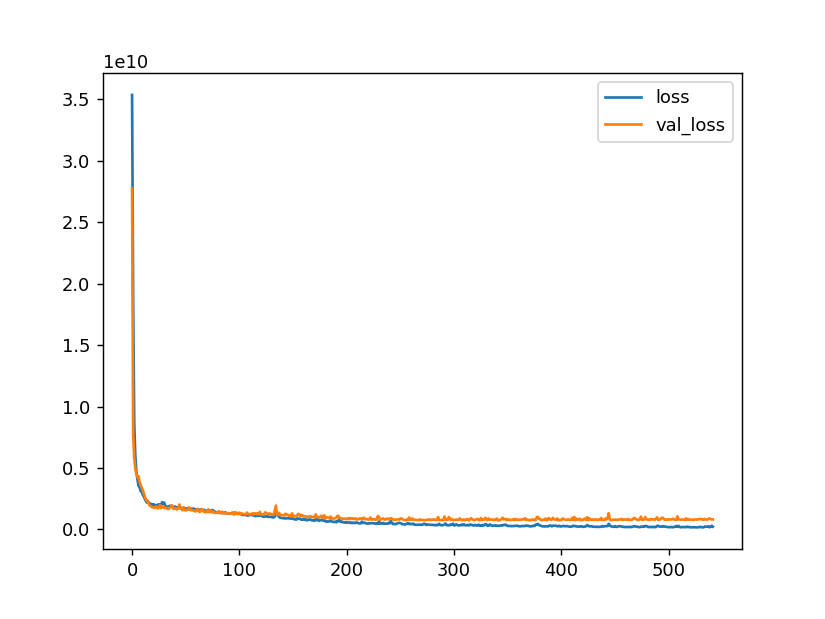

<AxesSubplot:>

In [48]:
loss_df.plot()

In [49]:
# make predictions

In [50]:
predictions=model.predict(x_test)

10/10 [==============================] - 0s 4ms/step


In [52]:
#evaluate model

In [53]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 5ms/step - loss: 723223936.0000


723223936.0

In [54]:
# r2 

In [55]:
r2_score(y_test,predictions)

0.9057114424051552

In [57]:
#mse

In [56]:
mean_squared_error(y_test,predictions)**.5

26892.824216835437

In [58]:
#save model

In [59]:
import joblib

In [60]:
joblib.dump(model,"model.joblib")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-

['model.joblib']

In [61]:
# sources

-Zafer Acar Notes -[https://poe.com/chat/2rhcfi4djoj4u359vfr]